# Medidas de tendência central

Voltar ao [índice](../00_indice.ipynb)

Este _notebook_ faz parte da análise das expectativas de vida nos diferentes distritos do município de São Paulo. 

**Objetivos** 

Verificar qual a moda, a mediana e a média das idades das pessoas no seu falecimento nos diferentes distritos de São Paulo.

**Você vai aprender:**
* O que é e como se calcula a [moda](#moda) de uma distribuição.
* O que é e como se calcula a [mediana](#mediana) de uma distribuição.
* O que é e como se calcula a [média](#media) de uma distribuição.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import sys

sys.path.append("../80_material-complementar/")
import auxiliar.zip as az

## 1. Da distribuição para um número representativo

Para conhecer mais sobre o conceito de distribuição, veja esta [seção do tutorial](10_analise_exp-vida_distritos_municipio-SP.ipynb#distribuicao).

In [2]:
# Baixando os dados:
url_fonte = 'https://nucleodetecnologia.com.br/dados/obitos-resid_por_idade_distrito-resid_2010-2019_limpo.zip'
arquivos  = ['obitos-resid_por_idade_distrito-resid_2010-2019_limpo.csv']
az.sincronizar_arquivos(url_fonte, './dados/limpos/', arquivos)

# Carregando os dados:
obitos_por_distrito_df = pd.read_csv('dados/limpos/obitos-resid_por_idade_distrito-resid_2010-2019_limpo.csv')

Arquivos já foram baixados


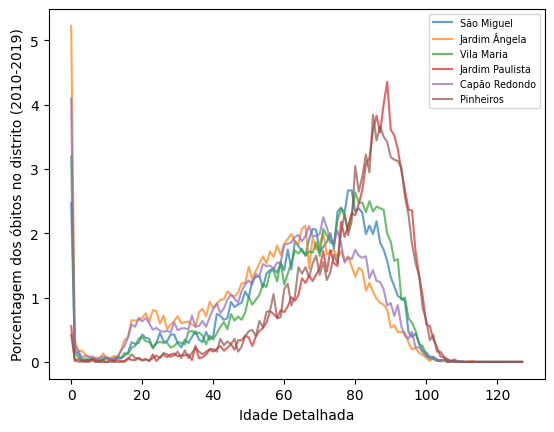

In [4]:
# Comparando a distribuição dos óbitos por idade, para diferentes distritos:
distritos_selecionados = ['São Miguel','Jardim Ângela','Vila Maria', 'Jardim Paulista','Capão Redondo','Pinheiros']
for distrito in distritos_selecionados:
    (obitos_por_distrito_df.set_index('Idade Detalhada')[distrito]/obitos_por_distrito_df[distrito].sum() * 100).plot(label=distrito, alpha=0.7)
pl.ylabel('Porcentagem dos óbitos no distrito (2010-2019)')
pl.legend(loc='upper right',fontsize='x-small')
pl.show()

Cada linha colorida do gráfico acima mostra a fração dos óbitos de um distrito que ocorreram em cada idade. Por exemplo: 
aproximadamente 4% dos óbitos ocorridos no Jardim Paulista são de pessoas de 84 anos, enquanto que um pouco mais de 5% das mortes no Jardim Ângela são de crianças com menos de um ano.  

<a id="moda"></a>
### 1.1. Moda

A moda nada mais é do que o valor mais repetido em uma população. No nosso exemplo, é a idade em que ocorrem mais óbitos. 

In [47]:
# Idade (índice) com maior número de mortes em cada bairro/distrito
idade_moda = obitos_por_distrito_df.loc[:, distritos_selecionados ].idxmax()

# Número de mortes de pessoas com as respectivas idades anteriores nos respectivos bairros/distritos
qtd_obitos_moda = obitos_por_distrito_df.loc[:, distritos_selecionados ].max()

tabela_moda = pd.DataFrame({'idade_moda':idade_moda,'qtd_obitos':qtd_obitos_moda,'qtd_obitos':qtd_obitos_moda},index=distritos_selecionados )

tabela_moda

,idade_moda,qtd_obitos
São Miguel,78,200
Jardim Ângela,0,675
Vila Maria,0,258
Jardim Paulista,89,298
Capão Redondo,0,533
Pinheiros,85,193


Dentre os distritos selecionados, vemos basicamente dois resultados: para Jardim Ângela, Vila Maria e Capão Redondo a idade exata na qual observamos mais mortes é de zero anos. Já para os distritos de São Miguel, Jardim Paulista e Pinheiros, o pico da distribuição ocorre na terceira idade, entre 78 e 89 anos. 

Entretanto, note que, apesar do altíssimo (e absurdo) número de óbitos de recém nascidos nas periferias, eles não a maioria das mortes ocorridas. Isso acontece pois a chance de óbito cai abruptamente para crianças com 1 ano ou mais. Já o óbito de pessoas com 63 anos, embora não tão frequente na periferia, é seguido por óbitos aos 60, 61, 62, etc. Ao somar os óbitos nessas várias idades, a frequência de mortes de adultos acaba sendo maior que a de recém-nascidos. 

<a id="mediana"></a>
### 1.2. Mediana

Mediana é definida como o valor que divide sua população ao meio, no nosso exemplo, o valor que é maior do que a idade de óbito de 50% da população. 

Para calculá-la, temos que utilizar a função median, considerando o número de indivíduos para cada idade de óbito. Para isso criaremos um arrary com as idades de óbito repetidas na mesma quantidade de indivíduos.

In [90]:
array_obitos = obitos_por_distrito_df['Jardim Ângela'].to_numpy()
individuos = []
c = 0
for i in obitos_por_distrito_df['Jardim Ângela']:
    for j in range(0, array_obitos[c]):
        individuos.append(c)
    c += 1
    
print(np.median(a = individuos))

60.0


Podemos criar uma tabela para as regiões selecionadas

In [93]:
mediana=[]
for distrito in distritos_selecionados:
    array_obitos = obitos_por_distrito_df[distrito].to_numpy()
    individuos = []
    c = 0
    for i in obitos_por_distrito_df[distrito]:
        for j in range(0, array_obitos[c]):
            individuos.append(c)
        c += 1
    
    mediana.append(np.median(a = individuos))


In [92]:
medianas_distritos=pd.DataFrame({'distrito':distritos_selecionados,'mediana':mediana})
medianas_distritos

,distrito,mediana
0,São Miguel,69.0
1,Jardim Ângela,60.0
2,Vila Maria,72.0
3,Jardim Paulista,83.0
4,Capão Redondo,63.0
5,Pinheiros,82.0


In [79]:
mediana =pd.DataFrame({'mediana':np.median(obitos_por_distrito_df[distritos_selecionados[0]])},index=[distritos_selecionados[0]])

for distrito in distritos_selecionados[1:]:
    mediana=pd.concat([mediana,pd.DataFrame({'mediana':np.median(obitos_por_distrito_df[distrito])},index=[distrito])])

mediana

,mediana
São Miguel,33.5
Jardim Ângela,91.5
Vila Maria,37.5
Jardim Paulista,17.0
Capão Redondo,82.5
Pinheiros,13.5


<a id="media"></a>
### 1.3. Média

$\bar{I} = \frac{1}{N} \left( I_1 + I_2 + \ldots +  I_N \right)= \frac{1}{N} \sum_{j=1}^N I_j$

In [110]:
print(np.average(a=obitos_por_distrito_df['Idade Detalhada'], weights=obitos_por_distrito_df['Jardim Ângela']))
print(np.average(a=obitos_por_distrito_df['Idade Detalhada'], weights=obitos_por_distrito_df['Jardim Paulista']))

#Idade média das mortes em Jardim Ângela e em Jardim Paulista

55.486720867208675
78.93594618309447


<center>
    <img src="https://nucleodetecnologia.com.br/assets/img/novo-logo-tecnologia.svg?bl=tutorial-exp-vida-15" width="150">
</center>